In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df= pd.read_csv("telecom_churn.csv")
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [75]:
#Data Understanding & Basic Checks
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [76]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [77]:
df.duplicated().sum()

np.int64(0)

In [78]:
df.columns = df.columns.str.replace(
    r'(?<!^)(?=[A-Z])', '_', regex=True
).str.lower()
df.columns

Index(['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins'],
      dtype='object')

In [79]:
df["churn_group"] = df["churn"].map({ 1: "Yes",
                                      0: "No"})

<Axes: xlabel='churn_group'>

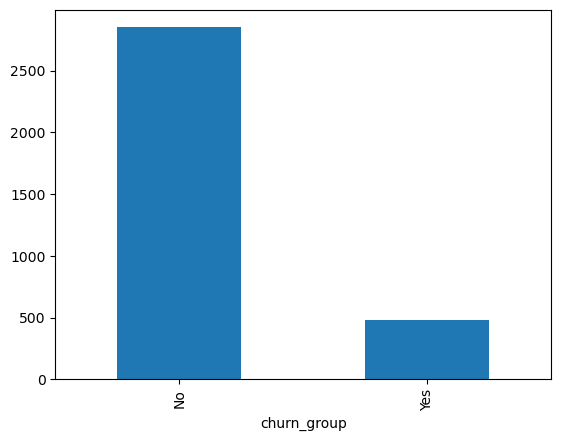

In [80]:
df["churn_group"].value_counts().plot(kind="bar")

In [95]:
#This means the amount of customer who churned out are very less compared to the customers using the telecom services

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             3333 non-null   int64  
 1   account_weeks     3333 non-null   int64  
 2   contract_renewal  3333 non-null   int64  
 3   data_plan         3333 non-null   int64  
 4   data_usage        3333 non-null   float64
 5   cust_serv_calls   3333 non-null   int64  
 6   day_mins          3333 non-null   float64
 7   day_calls         3333 non-null   int64  
 8   monthly_charge    3333 non-null   float64
 9   overage_fee       3333 non-null   float64
 10  roam_mins         3333 non-null   float64
 11  churn_group       3333 non-null   object 
dtypes: float64(5), int64(6), object(1)
memory usage: 312.6+ KB


In [82]:
pd.crosstab(df["churn_group"],df["contract_renewal"], normalize='index')*100

contract_renewal,0,1
churn_group,,
No,6.526316,93.473684
Yes,28.364389,71.635611


<Axes: xlabel='churn_group', ylabel='account_weeks'>

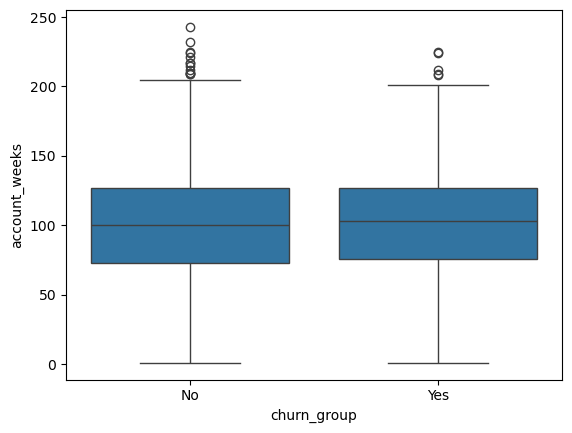

In [83]:
sns.boxplot(x='churn_group', y='account_weeks', data=df)

In [84]:
pd.crosstab(df["churn_group"],df["data_plan"], normalize='index')*100

data_plan,0,1
churn_group,,
No,70.456140,29.543860
Yes,83.436853,16.563147


In [85]:
df.groupby("churn")["monthly_charge"].mean()

churn
0    55.816246
1    59.190062
Name: monthly_charge, dtype: float64

<Axes: xlabel='churn_group', ylabel='monthly_charge'>

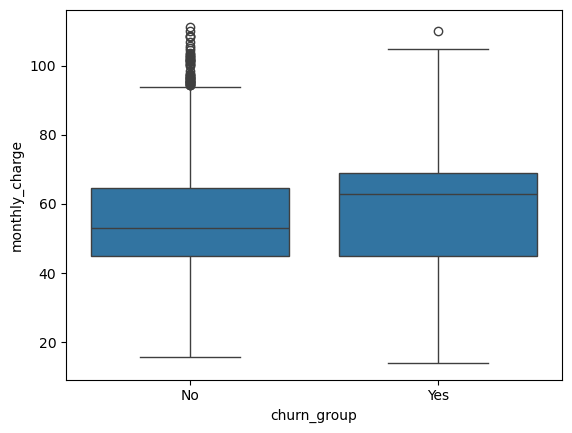

In [86]:
sns.boxplot(x="churn_group", y="monthly_charge", data=df)

<Axes: xlabel='churn', ylabel='cust_serv_calls'>

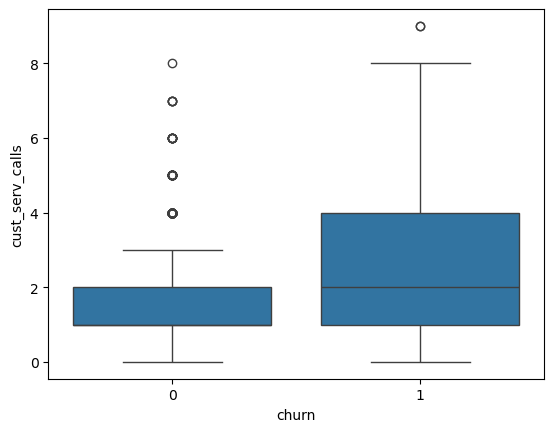

In [87]:
sns.boxplot(x='churn', y='cust_serv_calls', data=df)

In [88]:
df.groupby("churn_group")["day_calls"].mean()

churn_group
No     100.283158
Yes    101.335404
Name: day_calls, dtype: float64

In [89]:
df.columns

Index(['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins', 'churn_group'],
      dtype='object')

Text(0.5, 1.0, 'Feature Correlation')

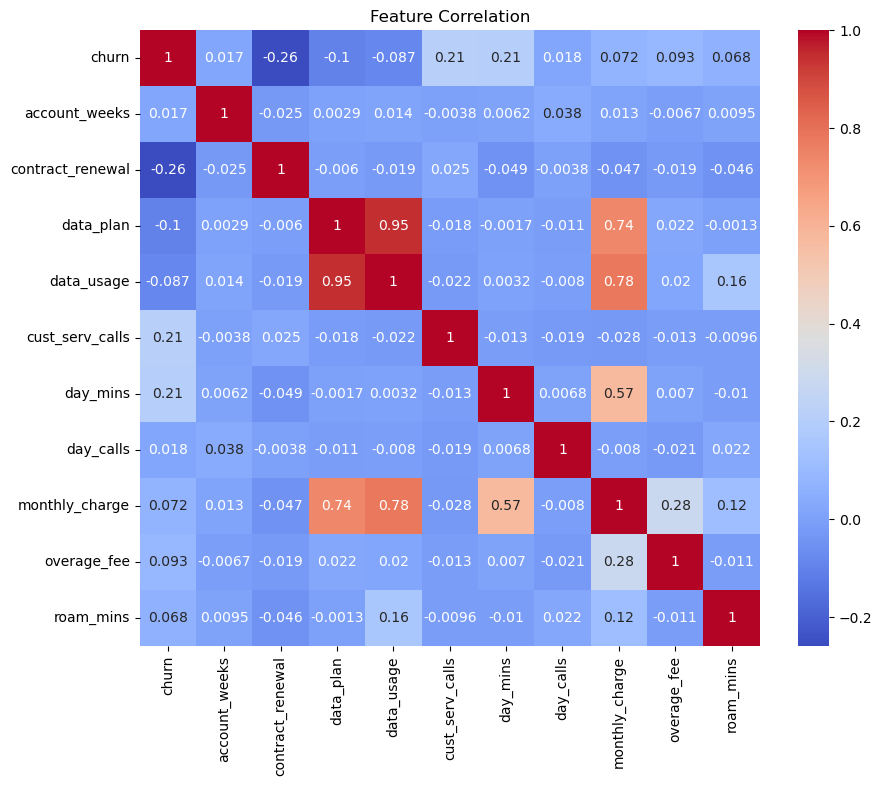

In [90]:
numerical_col = ['churn', 'account_weeks', 'contract_renewal', 'data_plan', 'data_usage',
       'cust_serv_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins']

plt.figure(figsize= (10,8))
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")

In [91]:
df.groupby("churn_group")["roam_mins"].mean()

churn_group
No     10.158877
Yes    10.700000
Name: roam_mins, dtype: float64

In [94]:
df.groupby("churn_group")["overage_fee"].mean()

churn_group
No      9.954618
Yes    10.623085
Name: overage_fee, dtype: float64

In [104]:
#Churn Rate
churned_customers= df["churn"].sum() 
total_customers= len(df)         

(churned_customers/total_customers)*100

np.float64(14.491449144914492)

In [111]:
df["cust_serv_calls"].max()

9

In [113]:
df["long_term_customer"] = np.where(df["account_weeks"]>=120 , "Yes", "No")
df["long_term_customer"] 

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
3328    Yes
3329     No
3330     No
3331    Yes
3332     No
Name: long_term_customer, Length: 3333, dtype: object

In [115]:
df["high_value_customer"] = np.where(df["monthly_charge"]>=60 , "Yes", "No")
df["high_complaints"]= np.where(df["cust_serv_calls"]>=3 , "Yes","No")

In [116]:
df.head(2)

,churn,account_weeks,contract_renewal,data_plan,data_usage,cust_serv_calls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins,churn_group,long_term_customer,high_value_customer,high_complaints
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,No,Yes,Yes,No
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,No,No,Yes,No


In [117]:
#Churned Customers 
df["churn"].sum()

np.int64(483)

In [121]:
df[df["churn"]==1]["monthly_charge"].mean()

np.float64(59.19006211180124)

In [118]:
df["monthly_charge"].mean()

np.float64(56.3051605160516)

In [119]:
df.to_csv("transformed_Churn_file.csv", index= False)